In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
import time
import matplotlib.pyplot as plt

2024-02-28 16:45:07.515157: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-28 16:45:07.543423: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 16:45:07.543457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 16:45:07.544123: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 16:45:07.548695: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import pandas as pd


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
seed = 4
tf.random.set_seed(seed)
np.random.seed(seed)

In [8]:
import os
path = "/home/djy0404/amr_ws/project/OXSTAR/shape/pics"

os.listdir(path)

['star_74.jpg',
 'star_275.jpg',
 'star_86.jpg',
 'tri_14.jpg',
 'tri_181.JPG',
 'tri_391.jpg',
 'tri_328.jpg',
 'star_92.jpg',
 'star_17.jpg',
 'tri_379.jpg',
 'star_11.jpg',
 'cir_188.JPG',
 'tri_270.jpg',
 'tri_37.jpg',
 'cir_232.jpg',
 'tri_127.JPG',
 'cir_16.jpg',
 'tri_48.jpg',
 'cir_113.JPG',
 'cir_45.jpg',
 'cir_39.jpg',
 'cir_62.jpg',
 'star_200.JPG',
 'star_61.jpg',
 'tri_201.jpg',
 'cir_189.JPG',
 'star_85.jpg',
 'tri_212.jpg',
 'star_42.jpg',
 'tri_397.jpg',
 'tri_261.jpg',
 'star_75.jpg',
 'star_2.jpg',
 'tri_73.jpg',
 'cir_355.jpg',
 'star_335.jpg',
 'tri_12.jpg',
 'tri_99.jpg',
 'tri_242.jpg',
 'star_33.jpg',
 'star_246.jpg',
 'cir_155.JPG',
 'cir_340.jpg',
 'star_220.jpg',
 'tri_269.jpg',
 'star_164.JPG',
 'cir_5.jpg',
 'cir_93.jpg',
 'cir_92.jpg',
 'star_167.JPG',
 'star_126.JPG',
 'tri_150.JPG',
 'tri_89.jpg',
 'tri_271.jpg',
 'tri_306.jpg',
 'tri_240.jpg',
 'star_286.jpg',
 'star_66.jpg',
 'tri_52.jpg',
 'tri_324.jpg',
 'star_268.jpg',
 'star_57.jpg',
 'tri_117.JPG',

In [9]:
full_path = os.listdir(path)
labels = [each.split('_')[0] for each in full_path]
file_id = [each.split('_')[1] for each in full_path]

/home/djy0404/amr_ws/project/OXSTAR/shape/pics
cir_377.jpg


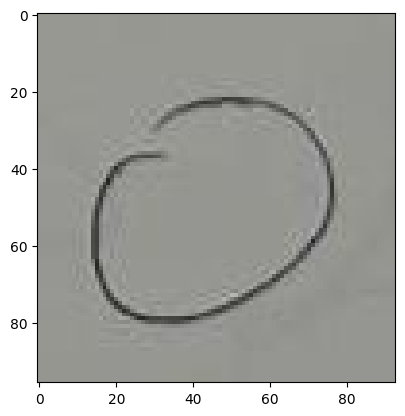

In [10]:
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
print(path)
sample = random.choice(full_path)
print(sample)

image = mpimg.imread(path + '/'+sample)
plt.imshow(image)
plt.show()

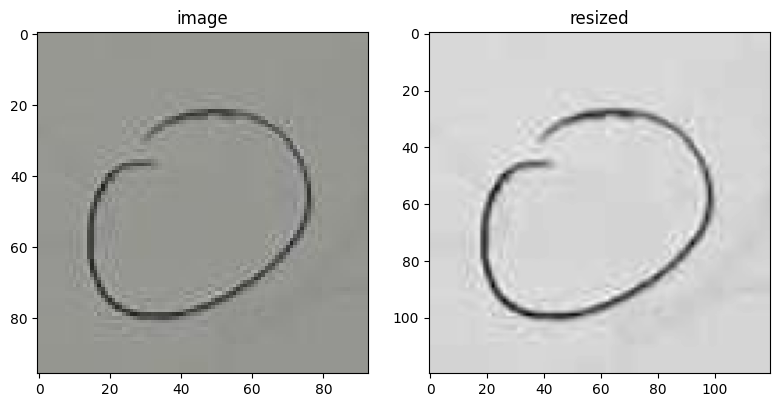

In [11]:
from skimage.transform import resize
resized = resize(image, (120,120,1))

fig, axes = plt.subplots(1,2,figsize = (8,4))
ax = axes.ravel()

ax[0].imshow(image,cmap = plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resized,cmap = plt.cm.gray)
ax[1].set_title("resized")

fig.tight_layout()
plt.show()

In [12]:
from skimage.color import rgb2gray
from tqdm.notebook import tqdm
import numpy as np

images = []
bar_total = tqdm(full_path)
for file in bar_total:
    image = mpimg.imread(path + "/" +file)
    images.append(resize(image, (120,120,1)))

images = np.array(images)


  0%|          | 0/1200 [00:00<?, ?it/s]

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)

In [73]:
test = zip(labels , labels_encoded)
test

for i in test:
    print(i)

('star', 1)
('star', 1)
('star', 1)
('tri', 2)
('tri', 2)
('tri', 2)
('tri', 2)
('star', 1)
('star', 1)
('tri', 2)
('star', 1)
('cir', 0)
('tri', 2)
('tri', 2)
('cir', 0)
('tri', 2)
('cir', 0)
('tri', 2)
('cir', 0)
('cir', 0)
('cir', 0)
('cir', 0)
('star', 1)
('star', 1)
('tri', 2)
('cir', 0)
('star', 1)
('tri', 2)
('star', 1)
('tri', 2)
('tri', 2)
('star', 1)
('star', 1)
('tri', 2)
('cir', 0)
('star', 1)
('tri', 2)
('tri', 2)
('tri', 2)
('star', 1)
('star', 1)
('cir', 0)
('cir', 0)
('star', 1)
('tri', 2)
('star', 1)
('cir', 0)
('cir', 0)
('cir', 0)
('star', 1)
('star', 1)
('tri', 2)
('tri', 2)
('tri', 2)
('tri', 2)
('tri', 2)
('star', 1)
('star', 1)
('tri', 2)
('tri', 2)
('star', 1)
('star', 1)
('tri', 2)
('star', 1)
('cir', 0)
('cir', 0)
('cir', 0)
('tri', 2)
('tri', 2)
('tri', 2)
('tri', 2)
('star', 1)
('cir', 0)
('star', 1)
('cir', 0)
('cir', 0)
('tri', 2)
('star', 1)
('cir', 0)
('star', 1)
('star', 1)
('tri', 2)
('tri', 2)
('tri', 2)
('cir', 0)
('cir', 0)
('star', 1)
('cir', 0)
('

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = \
    train_test_split(images, labels_encoded, test_size= 0.2, random_state= 4, stratify=labels_encoded)

In [58]:
model1 = models.Sequential([
    layers.Conv2D(120,(1,1),activation = "relu", input_shape = (120,120,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(240,(2,2),activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(240,(3,3),activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(360,(2,2),activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])

model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 120, 120, 120)     240       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 60, 60, 120)       0         
 ng2D)                                                           
                                                                 
 dropout_35 (Dropout)        (None, 60, 60, 120)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 60, 60, 240)       115440    
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 30, 30, 240)       0         
 ng2D)                                                           
                                                                 
 dropout_36 (Dropout)        (None, 30, 30, 240)      

In [59]:
model1.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 120, 120, 120)     240       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 60, 60, 120)       0         
 ng2D)                                                           
                                                                 
 dropout_35 (Dropout)        (None, 60, 60, 120)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 60, 60, 240)       115440    
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 30, 30, 240)       0         
 ng2D)                                                           
                                                                 
 dropout_36 (Dropout)        (None, 30, 30, 240)      

In [60]:
import time
start_time = time.time()
hist = model1.fit(X_train,y_train, epochs=5000, verbose=1, validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/5000


2024-02-28 15:07:07.476983: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_35/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - 3s 65ms/step - loss: 1.1891 - accuracy: 0.3438 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 2/5000
30/30 [==============================] - 2s 60ms/step - loss: 1.0991 - accuracy: 0.3313 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 3/5000
30/30 [==============================] - 2s 60ms/step - loss: 1.0986 - accuracy: 0.3396 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/5000
30/30 [==============================] - 2s 60ms/step - loss: 1.1006 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/5000
30/30 [==============================] - 2s 60ms/step - loss: 1.0990 - accuracy: 0.3260 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/5000
30/30 [==============================] - 2s 60ms/step - loss: 1.0987 - accuracy: 0.3365 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/5000
30/30 [==============================] - 2s 60ms/step - loss: 1.0990 - accuracy: 0.3115 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/5000

KeyboardInterrupt: 

In [ ]:
model1.evaluate(X_test, y_test, verbose= 2)

In [ ]:
plot_target = ["loss","val_loss","accuracy", "val_accuracy"]

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)

plt.legend()
plt.grid()
plt.show()

In [ ]:
prediction = model.predict(X_test)


In [ ]:
print(prediction)

In [ ]:
from sklearn.preprocessing import binarize
prediction = binarize(prediction, threshold=0.5)
prediction
test = np.argmax(prediction,axis=1)
print(test)

In [ ]:
print(y_test)

In [ ]:
wrong_result = []

for n in range(0, len(y_test)):
  if test[n] != y_test[n]:
    wrong_result.append(n)

len(wrong_result)

In [ ]:
import random

samples = random.choices(population= wrong_result, k = 6)

plt.figure(figsize = (14,12))

for idx, n in enumerate(samples):
  plt.subplot(3,2,idx+1)
  plt.imshow(X_test[n],interpolation = "nearest")
  plt.title(test[n])
  plt.axis('off')

plt.show()


In [50]:
model2 = models.Sequential([
    layers.Conv2D(32,(1,1),activation = "relu", input_shape = (120,120,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(2,2),activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    
    layers.Flatten(),
    layers.Dense(256, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])

model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 120, 120, 32)      64        
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 60, 60, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_31 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 64)        8256      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 30, 30, 64)       

In [51]:
model2.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 120, 120, 32)      64        
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 60, 60, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_31 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 64)        8256      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 30, 30, 64)       

In [52]:
import time
start_time = time.time()
hist = model2.fit(X_train,y_train, epochs=1000, verbose=1, validation_data = (X_test,y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/1000


2024-02-28 14:59:11.946296: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/dropout_31/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - 1s 12ms/step - loss: 1.2242 - accuracy: 0.3323
Epoch 2/1000
30/30 [==============================] - 0s 12ms/step - loss: 1.0991 - accuracy: 0.3281
Epoch 3/1000
30/30 [==============================] - 0s 12ms/step - loss: 1.0984 - accuracy: 0.3271
Epoch 4/1000
30/30 [==============================] - 0s 12ms/step - loss: 1.0992 - accuracy: 0.3125
Epoch 5/1000
30/30 [==============================] - 0s 11ms/step - loss: 1.0990 - accuracy: 0.3438
Epoch 6/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0990 - accuracy: 0.3146
Epoch 7/1000
30/30 [==============================] - 0s 12ms/step - loss: 1.0990 - accuracy: 0.3198
Epoch 8/1000
30/30 [==============================] - 0s 12ms/step - loss: 1.0987 - accuracy: 0.3427
Epoch 9/1000
30/30 [==============================] - 0s 12ms/step - loss: 1.0988 - accuracy: 0.3427
Epoch 10/1000
30/30 [==============================] - 0s 12ms/step - loss: 1.0991 - accuracy: 0.3333
Ep

In [53]:
model2.evaluate(X_test, y_test, verbose= 2)

8/8 - 0s - loss: 1.6508 - accuracy: 0.7958 - 119ms/epoch - 15ms/step


[1.6507642269134521, 0.7958333492279053]

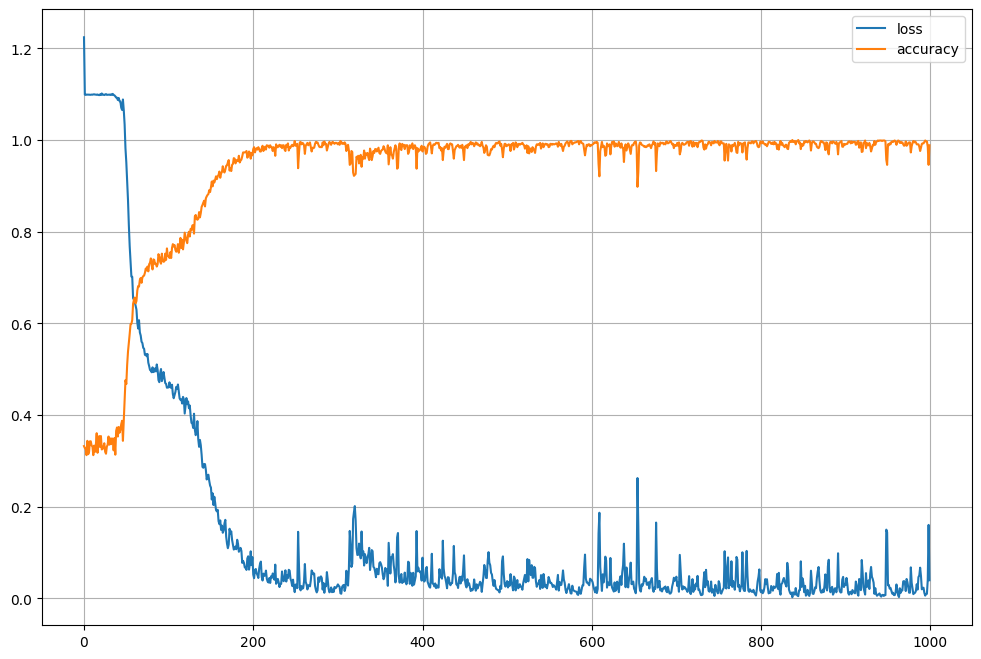

In [54]:
plot_target = ["loss","val_loss","accuracy", "val_accuracy"]

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)

plt.legend()
plt.grid()
plt.show()

In [55]:
from sklearn.preprocessing import binarize
prediction = model2.predict(X_test)

prediction = binarize(prediction, threshold=0.5)
prediction
test = np.argmax(prediction,axis=1)
print(test)

8/8 [==============================] - 0s 4ms/step
[0 0 1 2 2 0 0 2 1 2 1 0 0 1 0 2 2 0 1 1 1 2 2 2 2 1 1 1 0 2 1 0 0 0 1 1 1
 2 0 2 0 1 1 2 2 1 0 0 0 1 0 1 2 1 0 1 1 1 0 1 2 1 2 0 1 2 2 1 2 1 0 0 0 2
 2 1 1 1 0 0 2 0 0 2 0 2 0 1 0 2 2 1 0 0 1 2 1 1 2 0 0 2 2 2 0 0 2 0 0 1 0
 1 2 0 0 2 0 1 1 0 2 2 2 1 0 2 0 0 2 1 2 0 0 0 0 0 1 0 1 2 0 2 2 0 0 2 1 1
 1 2 1 0 1 1 2 2 0 0 0 0 2 0 1 1 0 1 1 0 1 2 0 1 0 2 1 2 0 2 2 2 0 2 0 1 2
 0 0 2 0 2 0 0 0 2 2 2 0 1 1 1 1 2 1 0 1 1 2 0 1 0 2 0 1 0 2 2 0 2 2 1 2 1
 0 0 1 0 0 1 0 1 0 0 0 2 2 2 2 1 0 2]


In [56]:
wrong_result = []

for n in range(0, len(y_test)):
  if test[n] != y_test[n]:
    wrong_result.append(n)

len(wrong_result)

51

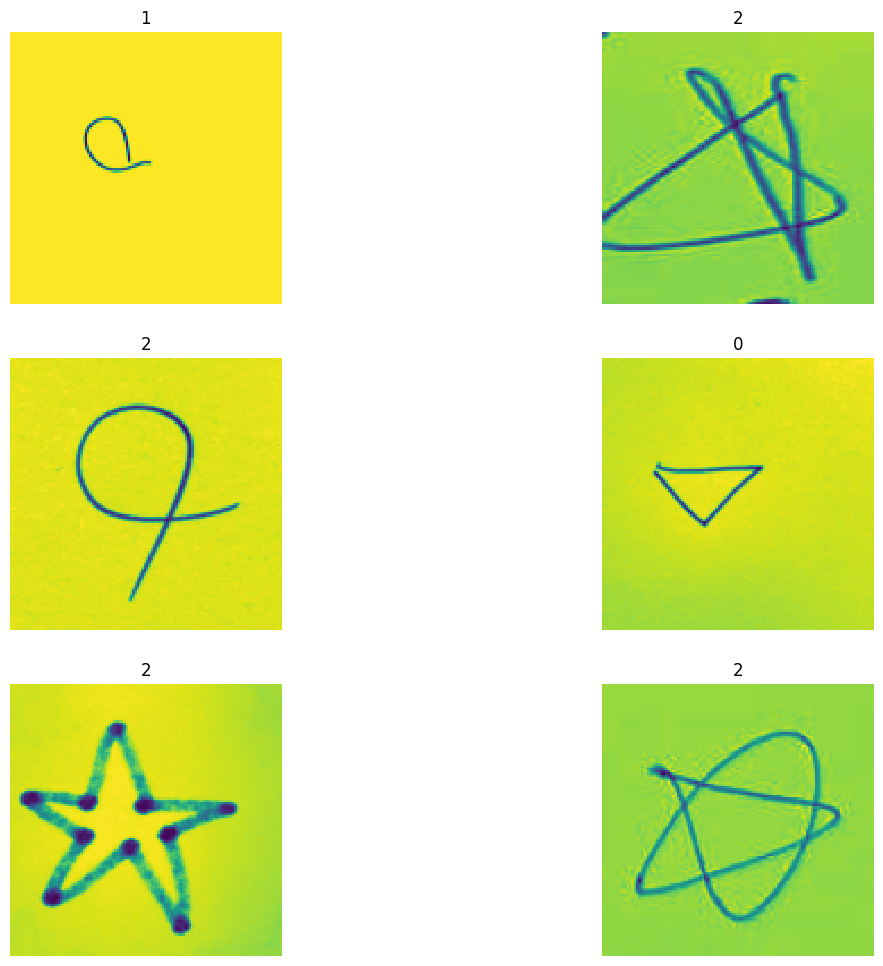

In [57]:
import random

samples = random.choices(population= wrong_result, k = 6)

plt.figure(figsize = (14,12))

for idx, n in enumerate(samples):
  plt.subplot(3,2,idx+1)
  plt.imshow(X_test[n],interpolation = "nearest")
  plt.title(test[n])
  plt.axis('off')

plt.show()


In [34]:
model3 = models.Sequential([
    layers.Conv2D(32,(1,1),activation = "relu", input_shape = (120,120,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(2,2),activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    
    layers.Flatten(),
    layers.Dense(256, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 120, 120, 32)      64        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 60, 60, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 60, 60, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 30, 30, 64)       

In [35]:
model3.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 120, 120, 32)      64        
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 60, 60, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 64)        8256      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 30, 30, 64)       

In [48]:
import time
start_time = time.time()
hist = model3.fit(X_train,y_train, epochs=1000, verbose=1, validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/1000
30/30 [==============================] - 0s 15ms/step - loss: 0.0410 - accuracy: 0.9844 - val_loss: 1.4412 - val_accuracy: 0.7583
Epoch 2/1000
30/30 [==============================] - 0s 13ms/step - loss: 0.0662 - accuracy: 0.9760 - val_loss: 1.2199 - val_accuracy: 0.8375
Epoch 3/1000
30/30 [==============================] - 0s 13ms/step - loss: 0.0505 - accuracy: 0.9823 - val_loss: 1.2661 - val_accuracy: 0.7667
Epoch 4/1000
30/30 [==============================] - 0s 13ms/step - loss: 0.0459 - accuracy: 0.9802 - val_loss: 1.0456 - val_accuracy: 0.8042
Epoch 5/1000
30/30 [==============================] - 0s 14ms/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 1.0587 - val_accuracy: 0.8125
Epoch 6/1000
30/30 [==============================] - 0s 13ms/step - loss: 0.0303 - accuracy: 0.9865 - val_loss: 1.2989 - val_accuracy: 0.7917
Epoch 7/1000
30/30 [==============================] - 0s 13ms/step - loss: 0.0286 - accuracy: 0.9885 - val_loss: 1.3254 - val_accuracy: 0.8000

In [49]:
model3.evaluate(X_test, y_test, verbose= 2)

8/8 - 0s - loss: 1.1362 - accuracy: 0.6500 - 52ms/epoch - 7ms/step


[1.1362429857254028, 0.6499999761581421]

In [38]:
from sklearn.preprocessing import binarize
prediction = model3.predict(X_test)

prediction = binarize(prediction, threshold=0.5)
prediction
test = np.argmax(prediction,axis=1)
print(test)

8/8 [==============================] - 0s 4ms/step
[2 0 1 2 2 0 0 2 2 2 1 0 0 1 0 1 2 0 1 1 2 2 2 2 2 1 1 2 0 2 1 0 2 0 2 1 2
 0 0 2 0 1 2 0 0 1 0 0 2 0 0 1 2 1 0 1 2 0 0 0 1 1 0 0 1 2 2 1 2 0 0 0 0 2
 2 1 0 1 1 0 2 0 0 2 0 2 0 1 0 0 1 2 0 2 1 2 0 1 1 0 0 2 2 2 0 0 2 0 0 1 0
 1 2 0 2 2 2 2 1 0 2 2 0 1 0 2 0 0 2 1 2 0 0 0 0 0 1 0 1 2 0 1 2 0 0 2 1 1
 0 0 1 0 1 0 2 2 0 0 0 2 0 0 1 1 0 1 1 0 1 2 0 1 0 1 0 2 2 2 2 2 0 2 0 1 2
 0 0 2 0 0 0 0 0 2 0 2 0 1 0 2 1 2 1 1 0 2 2 0 1 0 2 0 1 0 0 2 0 2 2 1 2 1
 0 0 1 0 0 1 2 1 0 0 0 2 2 2 2 1 0 2]


In [39]:
wrong_result = []

for n in range(0, len(y_test)):
  if test[n] != y_test[n]:
    wrong_result.append(n)

len(wrong_result)

53

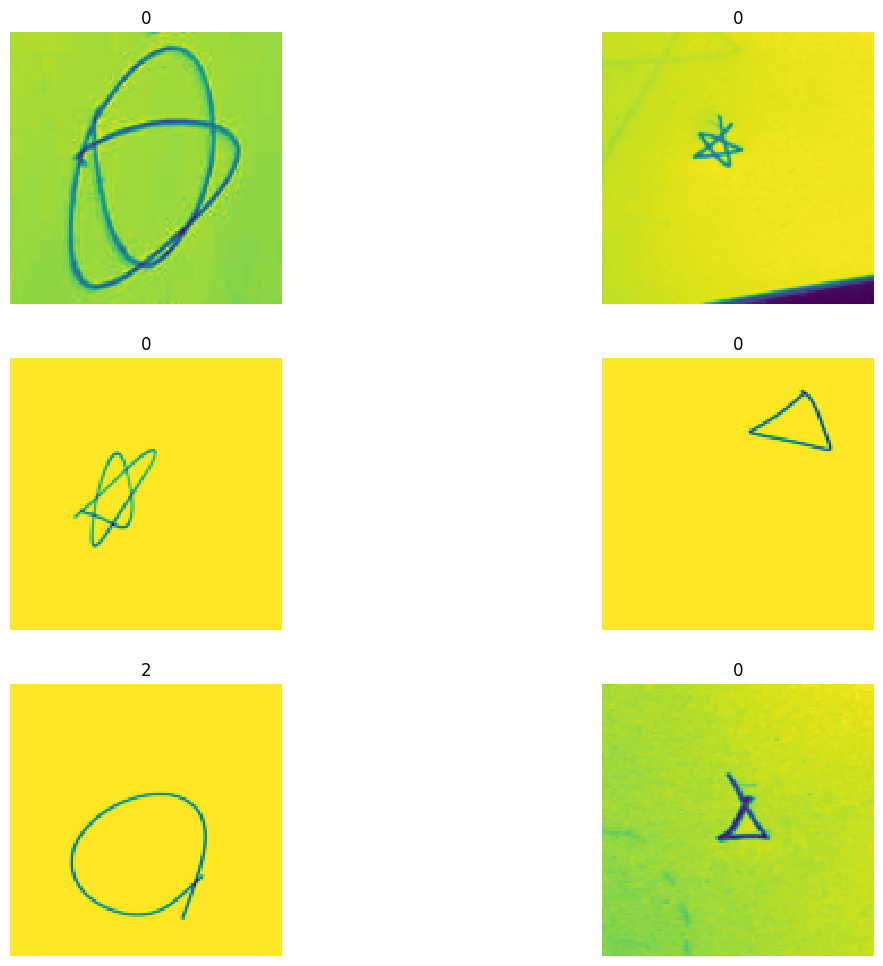

In [40]:
import random

samples = random.choices(population= wrong_result, k = 6)

plt.figure(figsize = (14,12))

for idx, n in enumerate(samples):
  plt.subplot(3,2,idx+1)
  plt.imshow(X_test[n],interpolation = "nearest")
  plt.title(test[n])
  plt.axis('off')

plt.show()


In [41]:
model4 = models.Sequential([
    layers.Conv2D(32,(1,1),activation = "relu", input_shape = (120,120,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(2,2),activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(2,2),activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    
    layers.Flatten(),
    layers.Dense(256, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])



In [42]:
model4.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 120, 120, 32)      64        
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 60, 60, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 64)        8256      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 30, 30, 64)       

In [ ]:
import time
start_time = time.time()
hist = model4.fit(X_train,y_train, epochs=1000, verbose=1, validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)

In [44]:
model4.evaluate(X_test, y_test, verbose= 2)

8/8 - 0s - loss: 1.7507 - accuracy: 0.6792 - 54ms/epoch - 7ms/step


[1.750701665878296, 0.6791666746139526]

In [45]:
model5 = models.Sequential([
    layers.Conv2D(32,(1,1),activation = "relu", input_shape = (120,120,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(2,2),activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(2,2),activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    
    layers.Flatten(),
    layers.Dense(256, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])



In [46]:
model5.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 120, 120, 32)      64        
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 60, 60, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 64)        8256      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_26 (Dropout)        (None, 30, 30, 64)       

In [47]:
import time
start_time = time.time()
hist = model5.fit(X_train,y_train, epochs=1000, verbose=1, validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/1000


2024-02-28 14:50:00.031847: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_25/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - 2s 19ms/step - loss: 1.1176 - accuracy: 0.3146 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/1000
30/30 [==============================] - 0s 15ms/step - loss: 1.0997 - accuracy: 0.3135 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/1000
30/30 [==============================] - 0s 14ms/step - loss: 1.0987 - accuracy: 0.3156 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/1000
30/30 [==============================] - 0s 14ms/step - loss: 1.0992 - accuracy: 0.3146 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 5/1000
30/30 [==============================] - 0s 14ms/step - loss: 1.0988 - accuracy: 0.3500 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 6/1000
30/30 [==============================] - 0s 14ms/step - loss: 1.0988 - accuracy: 0.3219 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 7/1000
30/30 [==============================] - 0s 14ms/step - loss: 1.0997 - accuracy: 0.3438 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/1000

KeyboardInterrupt: 

In [61]:
model7 = models.Sequential([
    layers.Conv2D(32,(1,1),activation = "relu", input_shape = (120,120,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(2,2),activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(64,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    
    layers.Flatten(),    
    layers.Dense(512, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])

model7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 120, 120, 32)      64        
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 60, 60, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 60, 60, 64)        8256      
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_41 (Dropout)        (None, 30, 30, 64)       

In [62]:
model7.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 120, 120, 32)      64        
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 60, 60, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 60, 60, 64)        8256      
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_41 (Dropout)        (None, 30, 30, 64)       

In [63]:
import time
start_time = time.time()
hist = model7.fit(X_train,y_train, epochs=1000, verbose=1, validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/1000


2024-02-28 15:12:49.261476: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_8/dropout_40/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - 2s 18ms/step - loss: 1.1693 - accuracy: 0.3396 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/1000
30/30 [==============================] - 0s 14ms/step - loss: 1.0989 - accuracy: 0.2948 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/1000
30/30 [==============================] - 0s 14ms/step - loss: 1.0987 - accuracy: 0.3167 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/1000
30/30 [==============================] - 0s 14ms/step - loss: 1.0988 - accuracy: 0.3344 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/1000
30/30 [==============================] - 0s 15ms/step - loss: 1.0988 - accuracy: 0.3073 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/1000
30/30 [==============================] - 0s 14ms/step - loss: 1.0987 - accuracy: 0.3063 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/1000
30/30 [==============================] - 0s 14ms/step - loss: 1.0987 - accuracy: 0.3365 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/1000

In [64]:
model7.evaluate(X_test, y_test, verbose= 2)

8/8 - 0s - loss: 1.3338 - accuracy: 0.7208 - 49ms/epoch - 6ms/step


[1.3338065147399902, 0.7208333611488342]

In [66]:
model8 = models.Sequential([
    layers.Conv2D(32,(1,1),activation = "relu", input_shape = (120,120,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(2,2),activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    

    
    layers.Flatten(),    
    layers.Dense(512, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])



In [67]:
model8.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 120, 120, 32)      64        
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 60, 60, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_47 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 60, 60, 64)        8256      
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_48 (Dropout)        (None, 30, 30, 64)      

In [68]:
import time
start_time = time.time()
hist = model8.fit(X_train,y_train, epochs=1000, verbose=1, validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/1000


2024-02-28 15:21:34.730243: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_10/dropout_47/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - 2s 22ms/step - loss: 1.8226 - accuracy: 0.3448 - val_loss: 1.1010 - val_accuracy: 0.3333
Epoch 2/1000
30/30 [==============================] - 1s 18ms/step - loss: 1.1011 - accuracy: 0.3656 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/1000
30/30 [==============================] - 1s 18ms/step - loss: 1.0993 - accuracy: 0.3281 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 4/1000
30/30 [==============================] - 1s 18ms/step - loss: 1.1005 - accuracy: 0.3323 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 5/1000
30/30 [==============================] - 1s 19ms/step - loss: 1.1007 - accuracy: 0.3260 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/1000
30/30 [==============================] - 1s 19ms/step - loss: 1.1002 - accuracy: 0.3198 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 7/1000
30/30 [==============================] - 1s 18ms/step - loss: 1.0983 - accuracy: 0.3354 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/1000

In [69]:
model8.evaluate(X_test, y_test, verbose= 2)

8/8 - 0s - loss: 1.3596 - accuracy: 0.7417 - 50ms/epoch - 6ms/step


[1.3596044778823853, 0.7416666746139526]

In [70]:
model9 = models.Sequential([
    layers.Conv2D(32,(1,1),activation = "relu", input_shape = (120,120,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(2,2),activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(64,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    
    layers.Flatten(),
    layers.Dense(256, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])

model9.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 120, 120, 32)      64        
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 60, 60, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_50 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 60, 60, 64)        8256      
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_51 (Dropout)        (None, 30, 30, 64)      

In [71]:
model9.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model9.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 120, 120, 32)      64        
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 60, 60, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_50 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 60, 60, 64)        8256      
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_51 (Dropout)        (None, 30, 30, 64)      

In [72]:
import time
start_time = time.time()
hist = model9.fit(X_train,y_train, epochs=5000, verbose=1, validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/5000


2024-02-28 15:32:35.351632: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_11/dropout_50/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - 2s 17ms/step - loss: 1.1731 - accuracy: 0.3521 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 2/5000
30/30 [==============================] - 0s 13ms/step - loss: 1.0990 - accuracy: 0.3208 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 3/5000
30/30 [==============================] - 0s 13ms/step - loss: 1.0989 - accuracy: 0.3198 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/5000
30/30 [==============================] - 0s 14ms/step - loss: 1.0988 - accuracy: 0.3385 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/5000
30/30 [==============================] - 0s 16ms/step - loss: 1.0991 - accuracy: 0.2937 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/5000
30/30 [==============================] - 0s 13ms/step - loss: 1.0989 - accuracy: 0.2979 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/5000
30/30 [==============================] - 0s 13ms/step - loss: 1.0990 - accuracy: 0.3208 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/5000

KeyboardInterrupt: 

In [ ]:
model9.evaluate(X_test, y_test, verbose= 2)

In [74]:
model10 = models.Sequential([
    layers.Conv2D(120,(1,1),activation = "relu", input_shape = (120,120,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(2,2),activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(32,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    
    layers.Flatten(),
    layers.Dense(256, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])



In [75]:
model10.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model10.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 120, 120, 120)     240       
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 60, 60, 120)       0         
 ng2D)                                                           
                                                                 
 dropout_58 (Dropout)        (None, 60, 60, 120)       0         
                                                                 
 conv2d_46 (Conv2D)          (None, 60, 60, 64)        30784     
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_59 (Dropout)        (None, 30, 30, 64)      

In [76]:
import time
start_time = time.time()
hist = model10.fit(X_train,y_train, epochs=5000, verbose=1, validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/5000


2024-02-28 16:00:02.346037: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_13/dropout_58/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - 3s 37ms/step - loss: 1.1244 - accuracy: 0.3135 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/5000
30/30 [==============================] - 1s 31ms/step - loss: 1.0989 - accuracy: 0.3187 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/5000
30/30 [==============================] - 1s 31ms/step - loss: 1.0993 - accuracy: 0.3365 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/5000
30/30 [==============================] - 1s 31ms/step - loss: 1.0990 - accuracy: 0.3302 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/5000
30/30 [==============================] - 1s 31ms/step - loss: 1.0988 - accuracy: 0.3271 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/5000
30/30 [==============================] - 1s 30ms/step - loss: 1.0992 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/5000
30/30 [==============================] - 1s 31ms/step - loss: 1.0993 - accuracy: 0.3344 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/5000

KeyboardInterrupt: 

In [83]:
model11 = models.Sequential([
    layers.Conv2D(120,(1,1),activation = "relu", input_shape = (120,120,1)),

    layers.Conv2D(120,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(16,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    
    layers.Flatten(),

    layers.Dense(64, activation = "relu"),
    layers.Dense(32, activation = "relu"),

    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])



In [84]:
model11.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model11.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 120, 120, 120)     240       
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 60, 60, 120)       0         
 ng2D)                                                           
                                                                 
 dropout_72 (Dropout)        (None, 60, 60, 120)       0         
                                                                 
 conv2d_58 (Conv2D)          (None, 59, 59, 16)        7696      
                                                                 
 max_pooling2d_56 (MaxPooli  (None, 29, 29, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_73 (Dropout)        (None, 29, 29, 16)      

In [85]:
import time
start_time = time.time()
hist = model11.fit(X_train,y_train, epochs=1000, verbose=1, validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/1000


2024-02-28 16:17:29.888511: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_17/dropout_72/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - 2s 31ms/step - loss: 1.1147 - accuracy: 0.3042 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/1000
30/30 [==============================] - 1s 24ms/step - loss: 1.0987 - accuracy: 0.3250 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/1000
30/30 [==============================] - 1s 24ms/step - loss: 1.0989 - accuracy: 0.3469 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/1000
30/30 [==============================] - 1s 25ms/step - loss: 1.0987 - accuracy: 0.3302 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/1000
30/30 [==============================] - 1s 24ms/step - loss: 1.0988 - accuracy: 0.3219 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/1000
30/30 [==============================] - 1s 24ms/step - loss: 1.0989 - accuracy: 0.2979 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/1000
30/30 [==============================] - 1s 25ms/step - loss: 1.0987 - accuracy: 0.3250 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/1000

KeyboardInterrupt: 

In [86]:
model13 = models.Sequential([
    layers.Conv2D(120,(1,1),activation = "relu", input_shape = (120,120,1)),

    layers.Conv2D(120,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(16,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    
    layers.Flatten(),

    layers.Dense(64, activation = "relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(16, activation = "relu"),

    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])



In [87]:
model13.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model13.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 120, 120, 120)     240       
                                                                 
 conv2d_60 (Conv2D)          (None, 119, 119, 120)     57720     
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 59, 59, 120)       0         
 ng2D)                                                           
                                                                 
 dropout_75 (Dropout)        (None, 59, 59, 120)       0         
                                                                 
 conv2d_61 (Conv2D)          (None, 59, 59, 16)        7696      
                                                                 
 max_pooling2d_58 (MaxPooli  (None, 29, 29, 16)        0         
 ng2D)                                               

In [88]:
import time
start_time = time.time()
hist = model13.fit(X_train,y_train, epochs=1000, verbose=1, validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/1000


2024-02-28 16:26:06.558311: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_18/dropout_75/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - 5s 72ms/step - loss: 1.1078 - accuracy: 0.3250 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/1000
30/30 [==============================] - 2s 62ms/step - loss: 1.0988 - accuracy: 0.2969 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/1000
30/30 [==============================] - 2s 61ms/step - loss: 1.0984 - accuracy: 0.3729 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/1000
30/30 [==============================] - 2s 63ms/step - loss: 1.1016 - accuracy: 0.3354 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/1000
30/30 [==============================] - 2s 62ms/step - loss: 1.0990 - accuracy: 0.3260 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/1000
30/30 [==============================] - 2s 62ms/step - loss: 1.0988 - accuracy: 0.3229 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/1000
30/30 [==============================] - 2s 61ms/step - loss: 1.0989 - accuracy: 0.3323 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/1000

KeyboardInterrupt: 

In [90]:
model14 = models.Sequential([
    layers.Conv2D(120,(1,1),activation = "relu", input_shape = (120,120,1)),

    layers.Conv2D(120,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(16,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    
    layers.Flatten(),
    
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(32, activation = "relu"),

    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])



In [91]:
model14.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model14.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 120, 120, 120)     240       
                                                                 
 conv2d_66 (Conv2D)          (None, 119, 119, 120)     57720     
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 59, 59, 120)       0         
 ng2D)                                                           
                                                                 
 dropout_81 (Dropout)        (None, 59, 59, 120)       0         
                                                                 
 conv2d_67 (Conv2D)          (None, 59, 59, 16)        7696      
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 29, 29, 16)        0         
 ng2D)                                               

In [92]:
import time
start_time = time.time()
hist = model13.fit(X_train,y_train, epochs=1000, verbose=1, validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/1000
30/30 [==============================] - 2s 59ms/step - loss: 0.0021 - accuracy: 0.9990 - val_loss: 5.0633 - val_accuracy: 0.7583
Epoch 2/1000
30/30 [==============================] - 2s 60ms/step - loss: 5.7280e-04 - accuracy: 1.0000 - val_loss: 4.9396 - val_accuracy: 0.7542
Epoch 3/1000
30/30 [==============================] - 2s 59ms/step - loss: 7.3376e-04 - accuracy: 1.0000 - val_loss: 4.8785 - val_accuracy: 0.7667
Epoch 4/1000
30/30 [==============================] - 2s 60ms/step - loss: 3.2071e-04 - accuracy: 1.0000 - val_loss: 4.8709 - val_accuracy: 0.7667
Epoch 5/1000
30/30 [==============================] - 2s 60ms/step - loss: 2.6104e-04 - accuracy: 1.0000 - val_loss: 4.8852 - val_accuracy: 0.7667
Epoch 6/1000
30/30 [==============================] - 2s 60ms/step - loss: 0.0015 - accuracy: 0.9990 - val_loss: 4.6506 - val_accuracy: 0.7667
Epoch 7/1000
30/30 [==============================] - 2s 60ms/step - loss: 4.6014e-04 - accuracy: 1.0000 - val_loss: 4.6125 - 

KeyboardInterrupt: 

In [15]:
model15 = models.Sequential([
    layers.Conv2D(10,(1,1),activation = "relu", input_shape = (120,120,1)),

    layers.Conv2D(20,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(40,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(80,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    
    layers.Flatten(),
    
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(32, activation = "relu"),

    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])



2024-02-28 17:03:11.068872: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-28 17:03:11.088258: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-28 17:03:11.088424: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [16]:
model15.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model15.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 10)      20        
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 20)      820       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 20)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 59, 59, 20)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 40)        3240      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 40)        0         
 g2D)                                                   

In [17]:
import time
start_time = time.time()
hist = model15.fit(X_train,y_train, epochs=1000, verbose=1, validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/1000


2024-02-28 17:03:51.202121: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-02-28 17:03:52.669142: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-28 17:03:53.857760: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f15ccc5fc30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-28 17:03:53.857781: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-28 17:03:53.861223: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709107433.962918  195214 device_compiler.h:186] Compiled clust

30/30 [==============================] - 6s 21ms/step - loss: 1.1236 - accuracy: 0.3271 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/1000
30/30 [==============================] - 0s 14ms/step - loss: 1.0988 - accuracy: 0.3385 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0989 - accuracy: 0.3177 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0996 - accuracy: 0.3667 - val_loss: 1.0984 - val_accuracy: 0.3333
Epoch 5/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0985 - accuracy: 0.3510 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 6/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0988 - accuracy: 0.3510 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 7/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0986 - accuracy: 0.3271 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 8/1000

In [18]:
model15.evaluate(X_test, y_test, verbose= 2)

8/8 - 0s - loss: 3.1637 - accuracy: 0.8417 - 45ms/epoch - 6ms/step


[3.163682222366333, 0.8416666388511658]

In [20]:
model16 = models.Sequential([
    layers.Conv2D(10,(1,1),activation = "relu", input_shape = (120,120,1)),

    layers.Conv2D(20,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(40,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(80,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(40,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    
    layers.Flatten(),
    
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(32, activation = "relu"),

    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])



In [21]:
model16.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 120, 120, 10)      20        
                                                                 
 conv2d_10 (Conv2D)          (None, 119, 119, 20)      820       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 59, 59, 20)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 59, 59, 20)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 59, 59, 40)        3240      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 29, 29, 40)        0         
 g2D)                                                 

In [22]:
import time
start_time = time.time()
hist = model16.fit(X_train,y_train, epochs=1000, verbose=1, validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/1000


2024-02-28 17:13:41.216236: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_9/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - 2s 19ms/step - loss: 1.1133 - accuracy: 0.3271 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 2/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0994 - accuracy: 0.3219 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 3/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0985 - accuracy: 0.3313 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 4/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0982 - accuracy: 0.3594 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/1000
30/30 [==============================] - 0s 14ms/step - loss: 1.0985 - accuracy: 0.3354 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 6/1000
30/30 [==============================] - 0s 14ms/step - loss: 1.0990 - accuracy: 0.3375 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 7/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0985 - accuracy: 0.3208 - val_loss: 1.0975 - val_accuracy: 0.3375
Epoch 8/1000

In [23]:
model16.evaluate(X_test, y_test, verbose= 2)

8/8 - 0s - loss: 1.9996 - accuracy: 0.8750 - 57ms/epoch - 7ms/step


[1.9995867013931274, 0.875]

In [25]:
model17 = models.Sequential([
    layers.Conv2D(10,(1,1),activation = "relu", input_shape = (120,120,1)),

    layers.Conv2D(20,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(40,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(80,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(40,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(40,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(32, activation = "relu"),

    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])



In [26]:
model17.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model17.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 120, 120, 10)      20        
                                                                 
 conv2d_15 (Conv2D)          (None, 119, 119, 20)      820       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 59, 59, 20)        0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 59, 59, 20)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 59, 59, 40)        3240      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 29, 29, 40)        0         
 ng2D)                                                

In [27]:
import time
start_time = time.time()
hist = model17.fit(X_train,y_train, epochs=1000, verbose=1, validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/1000


2024-02-28 17:25:03.743883: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_14/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - 2s 19ms/step - loss: 1.1022 - accuracy: 0.3281 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 2/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.1006 - accuracy: 0.3219 - val_loss: 1.0986 - val_accuracy: 0.3417
Epoch 3/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0989 - accuracy: 0.3333 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 4/1000
30/30 [==============================] - 0s 15ms/step - loss: 1.0992 - accuracy: 0.3208 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0988 - accuracy: 0.3448 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0990 - accuracy: 0.3323 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 7/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0986 - accuracy: 0.3365 - val_loss: 1.0982 - val_accuracy: 0.3417
Epoch 8/1000

In [28]:
model17.evaluate(X_test, y_test, verbose= 2)

8/8 - 0s - loss: 0.9335 - accuracy: 0.8958 - 47ms/epoch - 6ms/step


[0.9335496425628662, 0.8958333134651184]

In [29]:
model18 = models.Sequential([
    layers.Conv2D(10,(1,1),activation = "relu", input_shape = (120,120,1)),

    layers.Conv2D(20,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(40,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(80,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(40,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(40,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(16, activation = "relu"),

    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])



In [30]:
model18.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model18.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 120, 120, 10)      20        
                                                                 
 conv2d_21 (Conv2D)          (None, 119, 119, 20)      820       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 59, 59, 20)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 59, 59, 20)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 59, 59, 40)        3240      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 29, 29, 40)        0         
 ng2D)                                                

In [31]:
import time
start_time = time.time()
hist = model18.fit(X_train,y_train, epochs=1000, verbose=1, validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/1000


2024-02-28 17:34:26.844074: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_20/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - 2s 24ms/step - loss: 1.1051 - accuracy: 0.3406 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0998 - accuracy: 0.3344 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/1000
30/30 [==============================] - 0s 16ms/step - loss: 1.0983 - accuracy: 0.3490 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 4/1000
30/30 [==============================] - 0s 14ms/step - loss: 1.0981 - accuracy: 0.3542 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 5/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0993 - accuracy: 0.3167 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 6/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0992 - accuracy: 0.3646 - val_loss: 1.0984 - val_accuracy: 0.3333
Epoch 7/1000
30/30 [==============================] - 0s 13ms/step - loss: 1.0992 - accuracy: 0.3271 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/1000

In [32]:
model18.evaluate(X_test, y_test, verbose= 2)

8/8 - 0s - loss: 1.0292 - accuracy: 0.8917 - 47ms/epoch - 6ms/step


[1.0291846990585327, 0.8916666507720947]

In [34]:
model19 = models.Sequential([
    layers.Conv2D(10,(1,1),activation = "relu", input_shape = (120,120,1)),

    layers.Conv2D(20,(2,2),activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(40,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(80,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(40,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(40,(2,2),activation = "relu",padding = "same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(32, activation = "relu"),

    layers.Dropout(0.25),
    layers.Dense(3, activation = "softmax")
])



In [35]:
model19.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model19.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 120, 120, 10)      20        
                                                                 
 conv2d_33 (Conv2D)          (None, 119, 119, 20)      820       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 59, 59, 20)        0         
 ng2D)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 59, 59, 20)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 59, 59, 40)        3240      
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 29, 29, 40)        0         
 ng2D)                                                

In [36]:
import time
start_time = time.time()
hist = model19.fit(X_train,y_train, epochs=500, verbose=1, validation_data = (X_test, y_test))

print("fit time : ", time.time() - start_time)

Epoch 1/500


2024-02-28 17:42:42.694621: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/dropout_32/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - 2s 18ms/step - loss: 1.1004 - accuracy: 0.3531 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 2/500
30/30 [==============================] - 0s 14ms/step - loss: 1.1010 - accuracy: 0.3375 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/500
30/30 [==============================] - 0s 14ms/step - loss: 1.0986 - accuracy: 0.3510 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/500
30/30 [==============================] - 0s 13ms/step - loss: 1.0992 - accuracy: 0.3115 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/500
30/30 [==============================] - 0s 15ms/step - loss: 1.0988 - accuracy: 0.3427 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/500
30/30 [==============================] - 0s 13ms/step - loss: 1.0995 - accuracy: 0.3000 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/500
30/30 [==============================] - 0s 13ms/step - loss: 1.0992 - accuracy: 0.3229 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/500
30/30 

In [37]:
model19.evaluate(X_test, y_test, verbose= 2)

8/8 - 0s - loss: 0.5640 - accuracy: 0.9167 - 47ms/epoch - 6ms/step


[0.5640058517456055, 0.9166666865348816]

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "./figure/",
    target_size = (120,120),
    batch_size = 3,
    class_mode = "categorical"
)

Found 0 images belonging to 0 classes.


In [47]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# 테스트 이미지가 포함된 디렉토리 경로
test_dir = '../OXSTAR/figure/'

test_images = []
count = 0
for filename in os.listdir(test_dir):
    if count >= 100:
        break
    # 이미지 파일의 전체 경로 생성
    filepath = os.path.join(test_dir, filename)
    
    # 이미지 파일 로드 및 전처리
    image = load_img(filepath, target_size=(120, 120), color_mode='grayscale')  # 이미지 파일 로드 및 크기 조정 및 흑백으로 변환
    image = img_to_array(image)  # 이미지를 배열로 변환
    image = image / 255.0  # 이미지 정규화
    
    # 전처리된 이미지를 리스트에 추가
    test_images.append(image)
    count += 1

# 리스트를 넘파이 배열로 변환하여 모델에 전달할 수 있는 형식으로 준비
test_data = np.array(test_images)

# 모델 테스트
predictions = model19.predict(test_data)  # 모델 예측


4/4 [==============================] - 0s 54ms/step


In [59]:
predictions

array([[6.77169282e-06, 9.99961972e-01, 3.12407028e-05],
       [2.58830150e-05, 4.22004564e-03, 9.95754123e-01],
       [9.82614802e-05, 9.99663472e-01, 2.38210749e-04],
       [1.00000000e+00, 6.21855012e-09, 8.79910728e-11],
       [9.95362222e-01, 1.97957052e-04, 4.43987921e-03],
       [1.00000000e+00, 3.00495550e-13, 3.89120319e-16],
       [6.07565999e-01, 1.04558337e-02, 3.81978095e-01],
       [9.99999285e-01, 7.62594766e-07, 1.56079185e-08],
       [5.31148107e-04, 3.69792193e-01, 6.29676640e-01],
       [9.74035859e-01, 1.58117302e-02, 1.01524731e-02],
       [6.92003220e-03, 9.83769894e-01, 9.31001641e-03],
       [1.01356331e-25, 1.00000000e+00, 1.86105945e-25],
       [2.01118153e-16, 1.00000000e+00, 2.14105704e-14],
       [7.28485611e-06, 9.99743521e-01, 2.49234756e-04],
       [3.22270793e-10, 1.00000000e+00, 7.02460001e-09],
       [5.57341754e-01, 3.71112837e-03, 4.38947082e-01],
       [4.62389224e-11, 1.00000000e+00, 4.77476669e-11],
       [4.16421453e-10, 1.00000

In [53]:
print(test_images)

[array([[[0.85882354],
        [0.8745098 ],
        [0.8627451 ],
        ...,
        [0.8509804 ],
        [0.85882354],
        [0.84705883]],

       [[0.8509804 ],
        [0.8745098 ],
        [0.8666667 ],
        ...,
        [0.85490197],
        [0.84705883],
        [0.85490197]],

       [[0.8666667 ],
        [0.8627451 ],
        [0.8666667 ],
        ...,
        [0.85490197],
        [0.8509804 ],
        [0.85882354]],

       ...,

       [[0.7019608 ],
        [0.7137255 ],
        [0.70980394],
        ...,
        [0.7490196 ],
        [0.7490196 ],
        [0.7490196 ]],

       [[0.7019608 ],
        [0.7137255 ],
        [0.7176471 ],
        ...,
        [0.74509805],
        [0.75686276],
        [0.7490196 ]],

       [[0.7058824 ],
        [0.6901961 ],
        [0.7019608 ],
        ...,
        [0.74509805],
        [0.7529412 ],
        [0.75686276]]], dtype=float32), array([[[0.8117647 ],
        [0.8117647 ],
        [0.8117647 ],
        ...,
        [

In [52]:
from sklearn.metrics import accuracy_score

# 실제 클래스와 예측된 클래스
predicted_classes = np.argmax(predictions, axis=1)  # 예측된 클래스
y_anwer = test_data
predicted_classes

array([1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2])

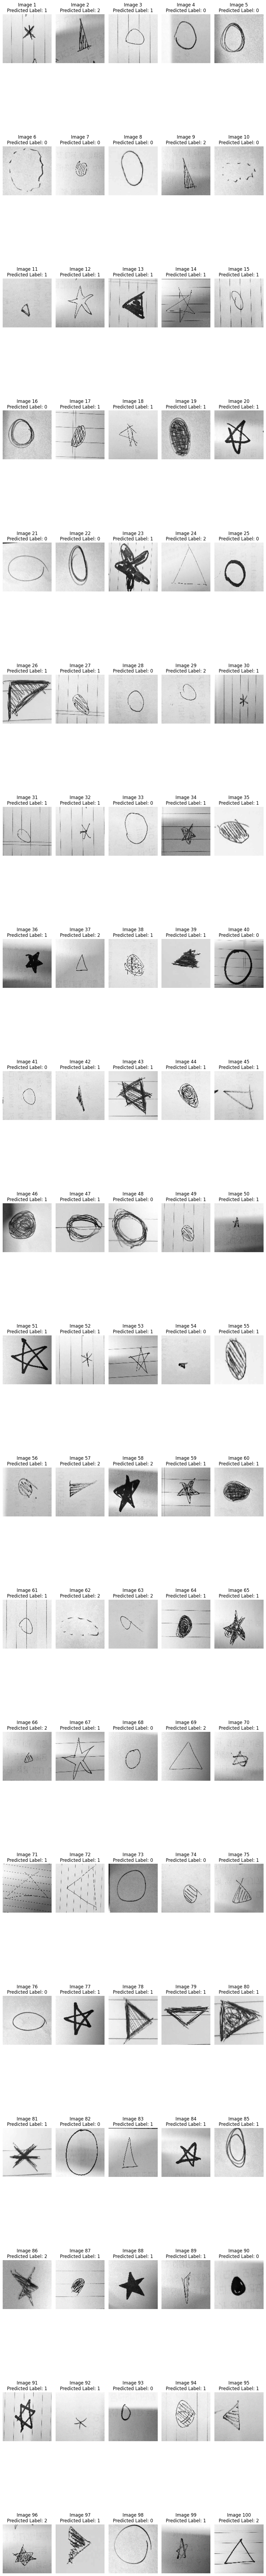

'\n1=star\n2=tri\n0=cir\n'

In [76]:
import matplotlib.pyplot as plt

# 시각화할 이미지의 갯수
num_images = len(test_images)

# 이미지를 시각화할 그리드 생성
rows = int(np.ceil(num_images / 5))  # 5개의 이미지를 한 행에 표시
cols = min(num_images, 5)  # 최대 5개의 열

# 이미지 시각화
plt.figure(figsize=(10, 100))
for i in range(0,100):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(test_images[i], cmap='gray')  # 흑백 이미지이므로 cmap='gray' 사용
    plt.title(f'Image {i+1}')
    plt.title(f'Image {i+1}\nPredicted Label: {np.argmax(predictions[i])}')  # 예측된 라벨 추가

    plt.axis('off')

plt.tight_layout()
plt.show()
"""
1=star
2=tri
0=cir
"""